In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [15]:
df=pd.read_csv('../MachineLearning/datasets/wine-clustering.csv')

In [16]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
df.shape

(178, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [19]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [20]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [21]:
df.sort_values('Alcohol',ascending=False).head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547


In [22]:
df.sort_values('Magnesium',ascending=False).head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [23]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

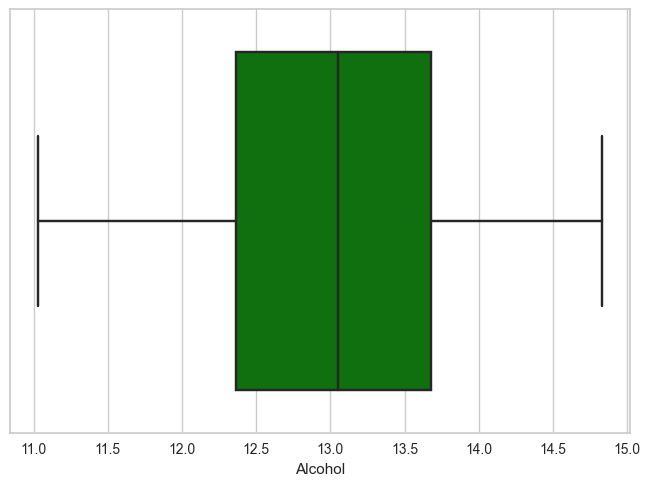

In [24]:
sns.boxplot(x=df['Alcohol'],color='green')
plt.show()

<Axes: xlabel='Magnesium'>

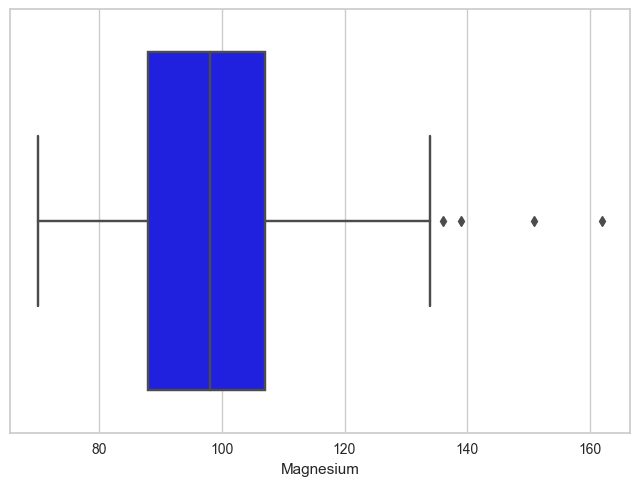

In [25]:
sns.boxplot(x=df['Magnesium'],color='blue')

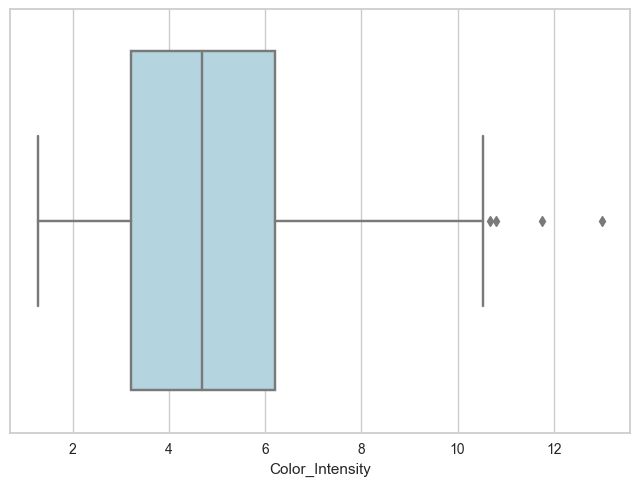

In [27]:
sns.boxplot(x = df['Color_Intensity'], color= '#ADD8E6')
plt.show()

<Axes: >

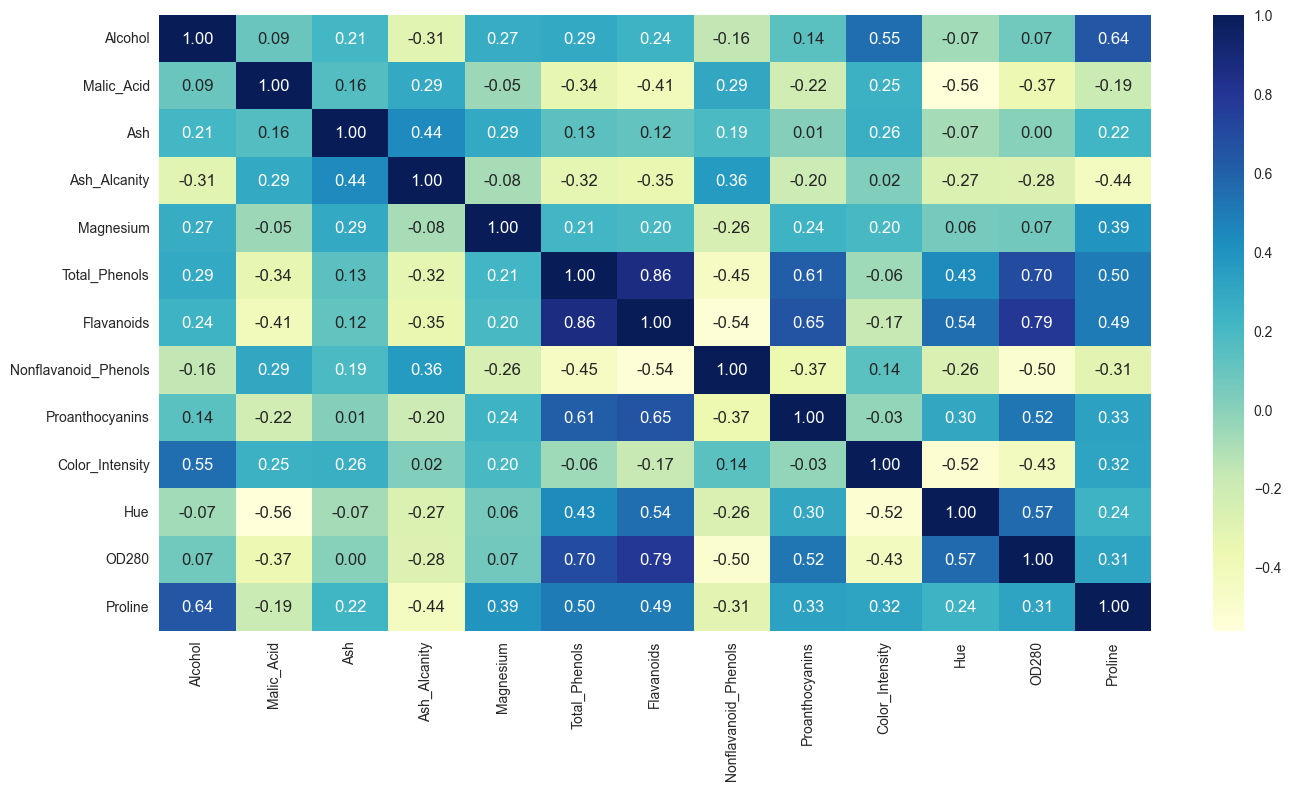

In [28]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [29]:
df=df[(df['Color_Intensity']<10.5)]
df=df[(df['Magnesium']<130.5)]
df.reset_index(drop=True,inplace=True)

In [30]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
scalar=StandardScaler()
scalar.fit(df)
df=pd.DataFrame(scalar.transform(df),columns=df.columns)

In [32]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.506992,-0.575214,0.248635,-1.163247,2.420563,0.799490,0.996195,-0.673308,1.329270,0.340695,0.359625,1.824142,0.997097
1,0.243502,-0.513102,-0.825531,-2.515063,0.154771,0.559786,0.697962,-0.837938,-0.504892,-0.264838,0.404801,1.086707,0.950225
2,0.194434,0.001541,1.137600,-0.241553,0.238690,0.799490,1.175135,-0.508678,2.273591,0.359918,0.314448,0.760533,1.372075
3,1.678729,-0.362258,0.507917,-0.794569,1.245708,2.477414,1.423663,-1.002569,1.129510,1.378750,-0.453548,1.157614,2.293896
4,0.292569,0.205623,1.878404,0.495801,1.665299,0.799490,0.628374,0.232158,0.475749,-0.293672,0.359625,0.420178,-0.034092


In [35]:
pca = PCA(n_components=3)
pca.fit(df)
df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,167.0,4.813182e-16,2.206910,-4.260166,-2.084161,-0.033965,2.050198,4.505223
col2,167.0,5.850277e-17,1.641382,-3.403359,-1.142664,-0.430337,1.473333,4.047235
col3,167.0,2.127373e-17,1.217250,-4.770163,-0.788753,-0.074519,0.670909,5.475857


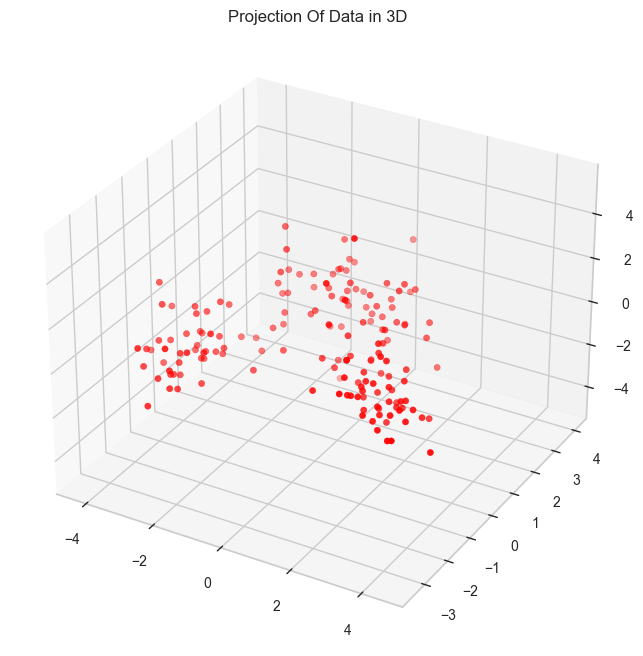

In [36]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['col1'],df['col2'],df['col3'],c='red',marker='o')
ax.set_title('Projection Of Data in 3D')
plt.show()

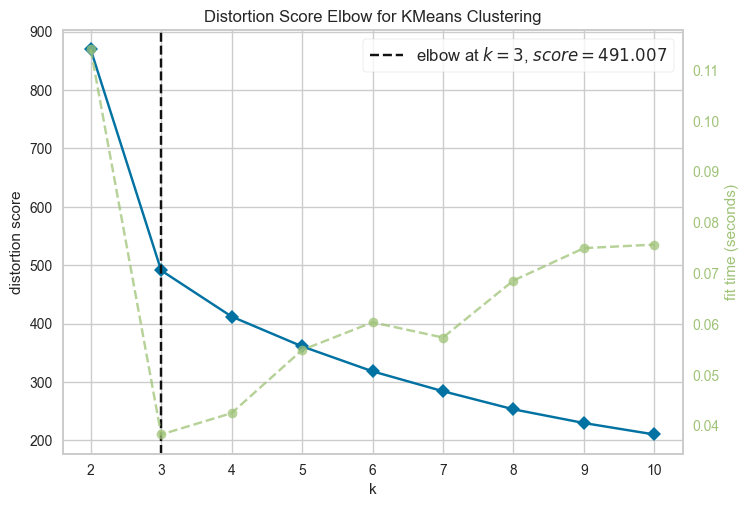

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(df)
elbow.show()

In [38]:
ac=AgglomerativeClustering(n_clusters=3)
ac_pred=ac.fit_predict(df)

df['Cluster']=ac_pred


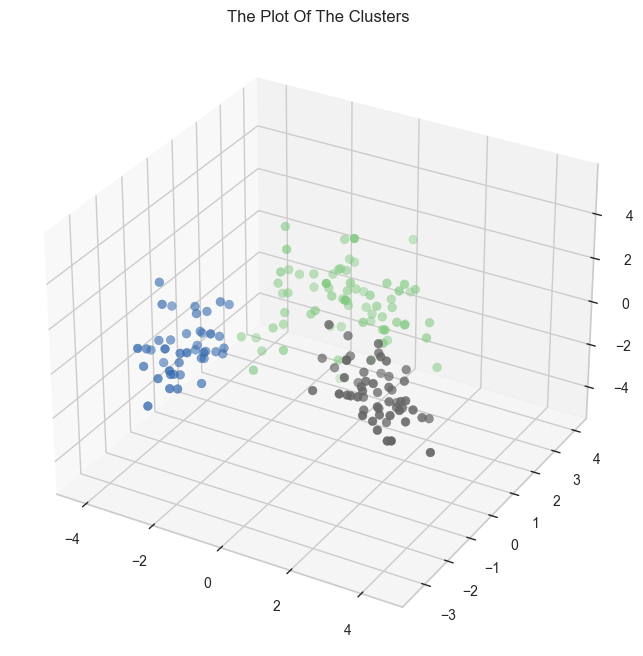

In [43]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(df['col1'],df['col2'],df['col3'],s=40,c=df['Cluster'],marker='o',cmap='Accent')
ax.set_title("The Plot Of The Clusters")
plt.show()

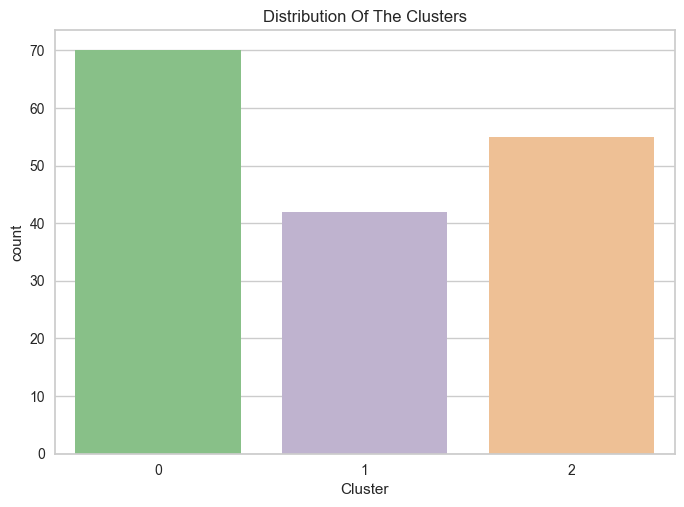

In [44]:
fig = sns.countplot(x=df["Cluster"], palette= "Accent")
fig.set_title("Distribution Of The Clusters")
plt.show()

In [47]:
df["Cluster"] = df.loc[:,"Cluster"]

In [48]:
df.head()

,col1,col2,col3,Cluster
0,3.472860,-1.575206,0.046621,2
1,2.210172,0.271772,-1.981361,2
2,2.615193,-0.830226,1.140860,2
3,3.950169,-2.653802,-0.020514,2
4,1.078318,-0.976033,2.196951,2


In [49]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [51]:
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  2  1]
 [ 0  8  0]
 [ 0  0 11]]


0.9285714285714286

In [53]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final.head()

,Acctuate,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
